In [14]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

In [3]:
def read_fasta(file_path):
    with open(file_path, "r") as file:
        for i, line in enumerate(file):
            if i == 40:
                break
            print(line)

file_path_fasta = "/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/" \
                  "wetransfer_ngs-data_2023-11-14_1231/NGS data/ASV.fa"

read_fasta(file_path_fasta)

>Zotu1

GCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCGACGCCGCGTGAGGGATGACGGCCTTCGGGTTGTA

AACCTCTTTCAGTAGGGAAGAAGCGAAAGTGACGGTACCTGCAGAAGAAGCGCCGGCTAACTACGTGCCAGCAGCCGCGG

TAATACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAG

TCCGGGGCTCAACTCCGGATCTGCGGTGGGTACGGGCAGACTAGAGTGATGTAGGGGAGACTGGAATTCCTGGTGTAGCG

GTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCATTAACTGACGCTGAGGAGCGAAAGC

ATGGGGAGCGAACAGGATTAGATACC

>Zotu2

GCTGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCGACGCCGCGTGAGGGATGACGGCCTTCGGGTTGTA

AACCTCTTTCAGTAGGGAAGAAGCGAAAGTGACGGTACCTGCAGAAGAAGCGCCGGCTAACTACGTGCCAGCAGCCGCGG

TAATACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAG

TCCGGGGCTCAACTCCGGATCTGCGGTGGGTACGGGCAGACTAGAGTGATGTAGGGGAGACTGGAATTCCTGGTGTAGCG

GTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCATTAACTGACGCTGAGGAGCGAAAGC

ATGGGGAGCGAACAGGATTAGATACC

>Zotu3

GCAGCAGTGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGCGTGGGTGAAGAAGGCCTTAGGGTTGTA

AACCCCTTTCAGCGGGGA

In [6]:
sample_names = set()

with open(file_path_fasta, 'r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        sample_name = record.id.split()[0]  # Extracting the sample name, assuming it is the first word
        sample_names.add(sample_name)

# Count the number of unique samples
num_samples = len(sample_names)

print(f'Total number of samples: {num_samples}')

Total number of samples: 44400


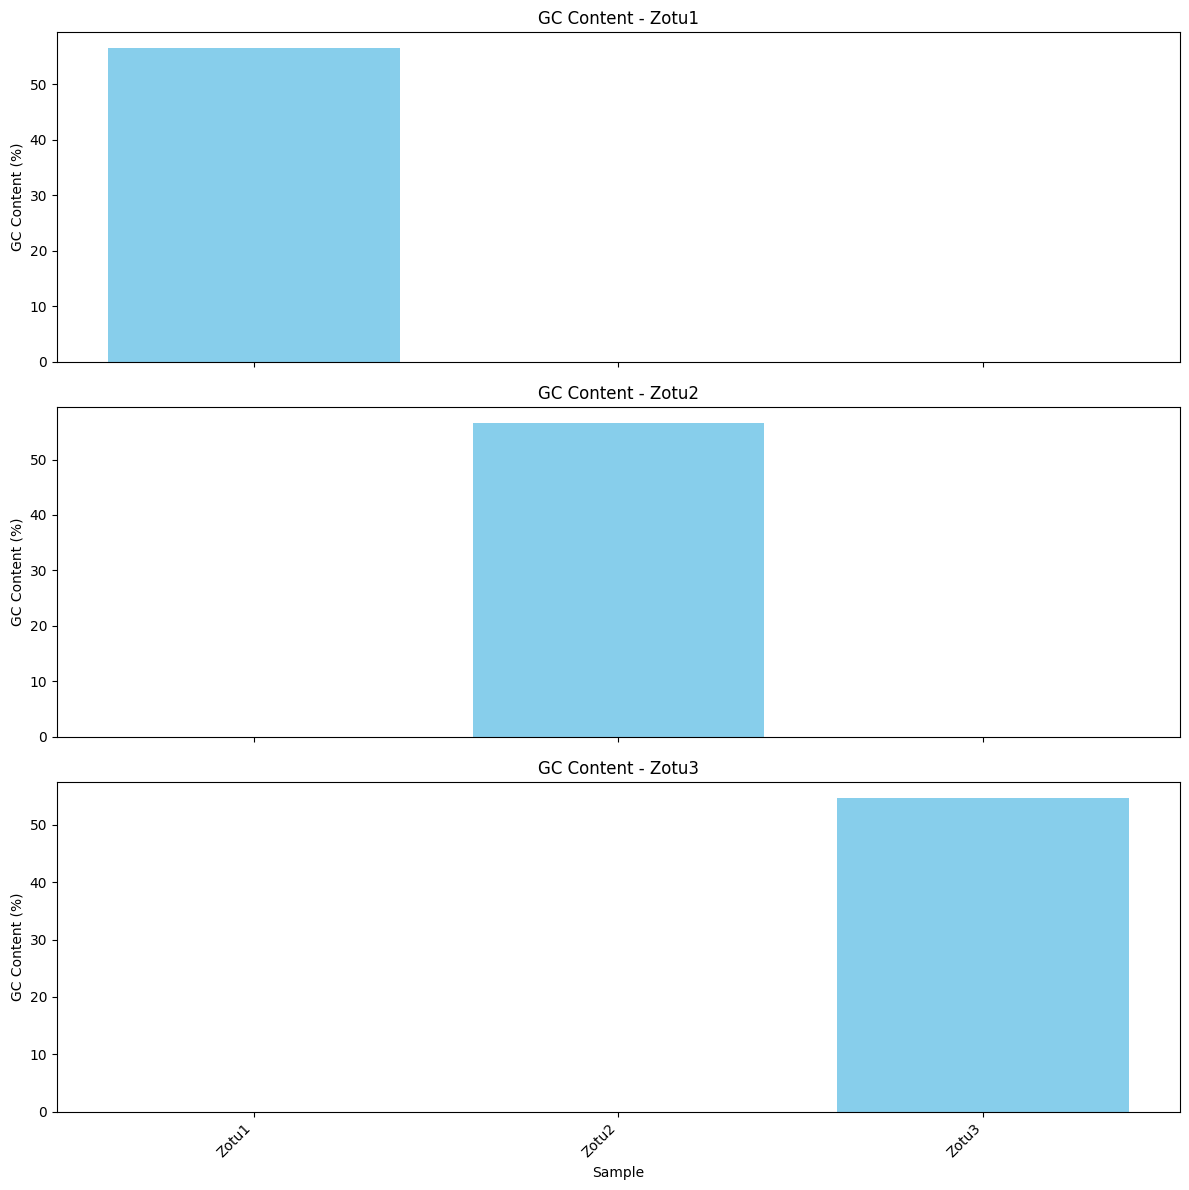

In [7]:
sample_sequences = {}

with open(file_path_fasta, 'r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        sample_name = record.id
        sequence = str(record.seq)

        sample_sequences[sample_name] = sequence

num_samples_to_plot = 3
fig, axes = plt.subplots(num_samples_to_plot, 1, figsize=(12, 4 * num_samples_to_plot), sharex=True)

for i, (sample_name, sequence) in enumerate(list(sample_sequences.items())[:num_samples_to_plot]):
    gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
    axes[i].bar(sample_name, gc_content, color='skyblue')
    axes[i].set_ylabel('GC Content (%)')
    axes[i].set_title(f'GC Content - {sample_name}')

plt.xlabel('Sample')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

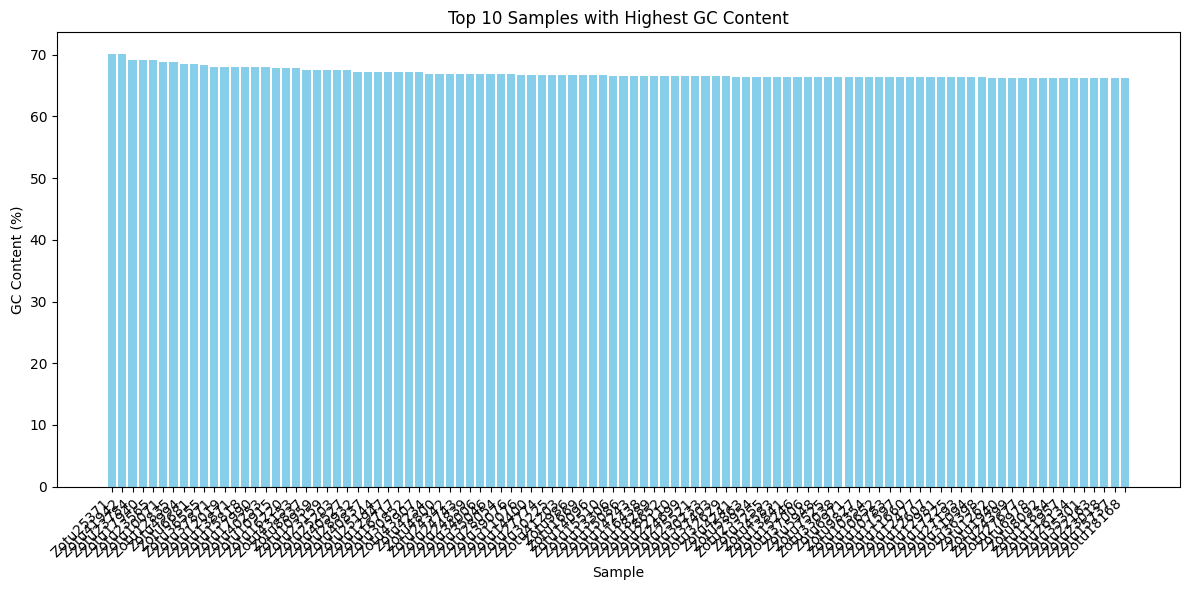

In [10]:
sample_sequences = {}

with open(file_path_fasta, 'r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        sample_name = record.id
        sequence = str(record.seq)

        sample_sequences[sample_name] = sequence

# Calculate GC content for each sample
gc_contents = {sample_name: (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
               for sample_name, sequence in sample_sequences.items()}

# Sort samples based on GC content and select the top 100
top_samples = sorted(gc_contents.items(), key=lambda x: x[1], reverse=True)[:100]

plt.figure(figsize=(12, 6))
samples, gc_values = zip(*top_samples)
plt.bar(samples, gc_values, color='skyblue')
plt.title('Top 10 Samples with Highest GC Content')
plt.xlabel('Sample')
plt.ylabel('GC Content (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
mapping = pd.read_csv("/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/wetransfer_ngs-data_2023-11-14_1231/Mapping.txt", sep="	", index_col=0)

mapping

,Variable1,Variable2,Variable3,Variable4
Sample,,,,
S098P8292,So,Af,Nk,Ja
S099P8292,So,Af,Nk,Ja
S100P8292,So,Af,Nk,Ja
S101P8292,So,Af,Nk,Ja
S080P8292,So,Ge,Nk,Ja
...,...,...,...,...
S097P7795,So,Ge,Pl,Ne
S090P7795,Su,Ge,Pl,Ne
S092P7795,Su,Ge,Pl,Ne


<Figure size 1200x800 with 0 Axes>

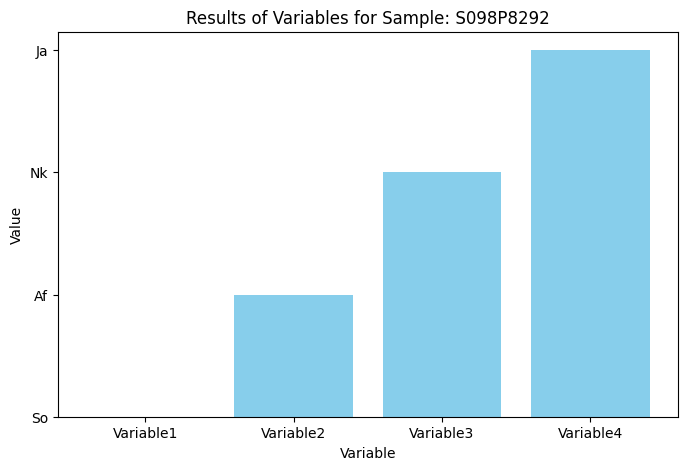

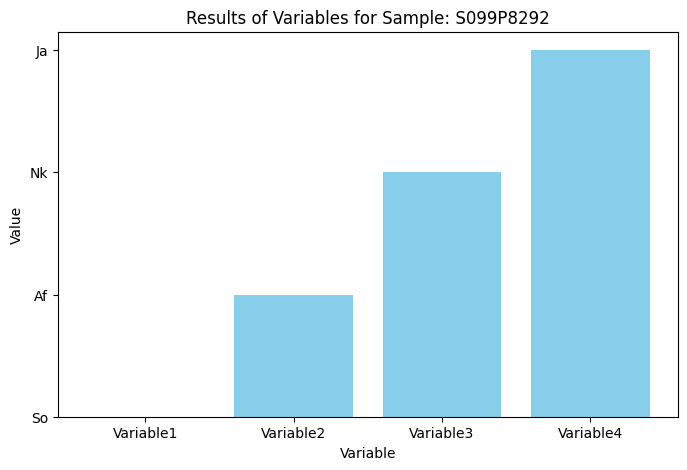

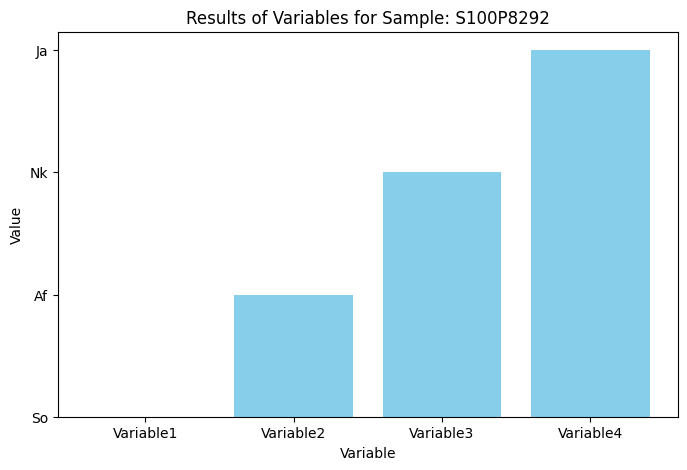

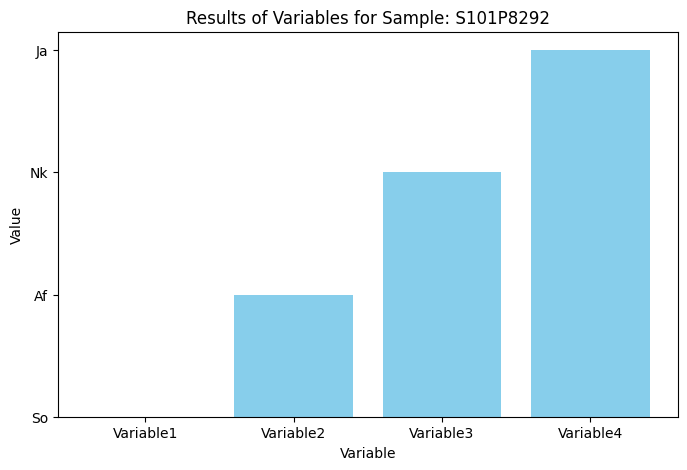

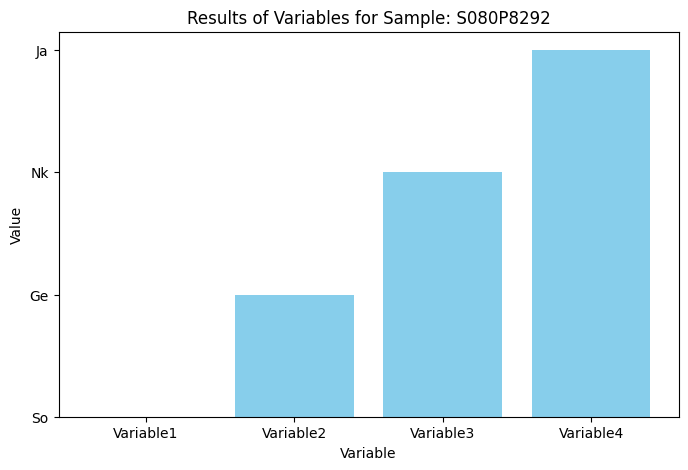

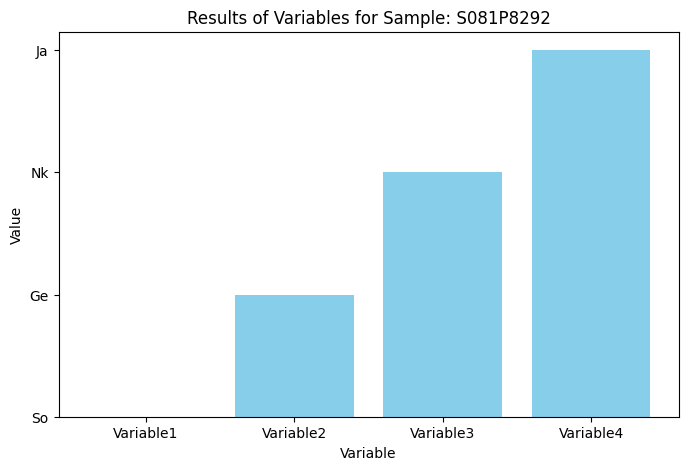

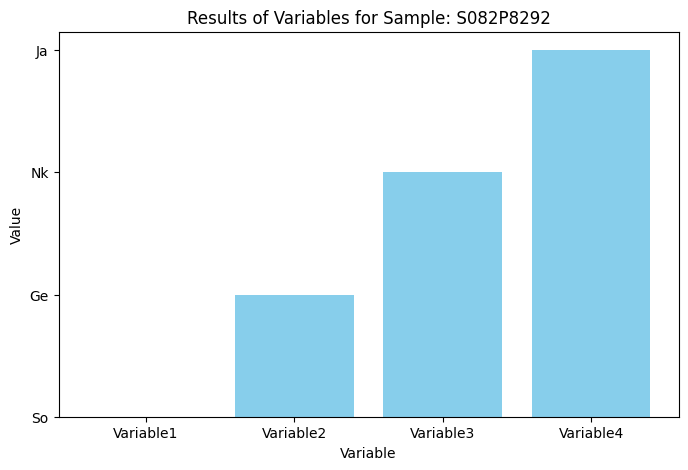

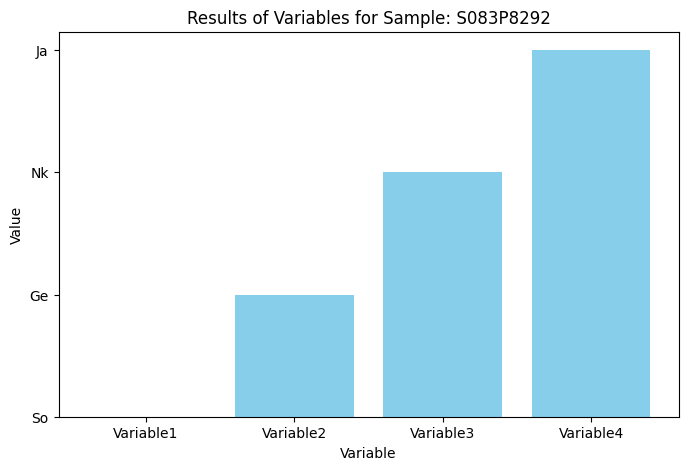

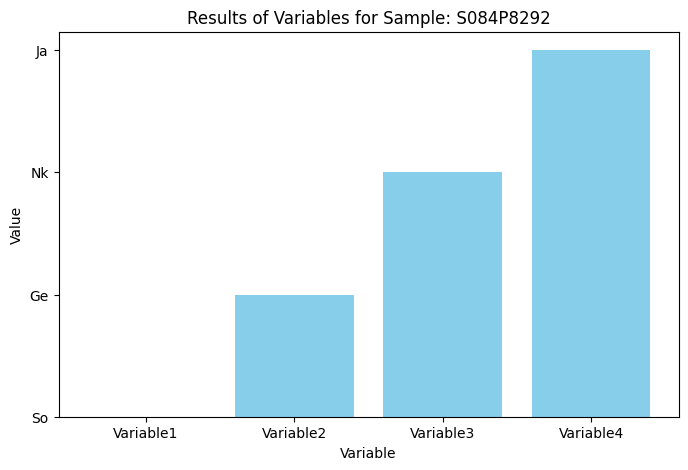

<Figure size 800x500 with 0 Axes>

In [ ]:
taxonomy = pd.read_csv("/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/"
                       "wetransfer_ngs-data_2023-11-14_1231/NGS data/ASV_taxonomy.txt", sep="	", header=0,
                       index_col=0)

In [ ]:
counts = pd.read_csv(
    "/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/wetransfer_ngs-data_2023-11-14_1231/NGS data/ASV_counts.txt",
    sep="	", header=0,
    index_col=0)

In [32]:
blast_results = pd.read_csv("/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/wetransfer_ngs-data_2023-11-14_1231/NGS data/blast_results.txt", sep=",", header=0,
                       index_col=0)

**Dataset description (how were they collected, what data types do the variables have, what are the units and physical quantities, how are missing data encoded, etc.)**

The data that we use in the EDA is provided by Bioclear Earth. This data is the result from Next Generation Sequencing data, also known as NGS. The data contains 6 different files. To start off, there is a txt file that explains the content of 4 of the other files.
The file that is not explained is the Mapping.txt file. This file contains anonymised data with the sample id's, 4 unknown variables and per variable there are multiple unexplained abbrevations.
The first explained file is is ASV.fa, this fasta file contains the unique amplicon sequence variant sequences for the samples.
The second explained file is ASV_counts.txt, in this file is an abundance table created by mapping the found asv's to the sequences of the samples.
The third explained file is ASV_taxonomy.txt, this file has the taxonomy for the found asv's. The taxonomy is split up in 7 taxonomic ranks. The ranks are Domain, Phylum, Class, Order, Family, Genus and Species.
The fourth explained file is Blast_results.txt, this file is used to double check the taxonomy using only species. This is done because of taxonomy classification errors.

All the files appear to contain strings, not integers or floats as their data.


**Data summary (number of cases, number of variables, basic statistical description (i.e. mean, median, sd etc.), variable distributions (normal or not, outliers, missing data, skewed distributions))**

For our data is it difficult to provide statistical data points such as a mean or median, because we work with strings and not integers or floats.

**Visual summaries (using boxplots, histograms, density plots)**

In [7]:
df_counts = pd.read_csv("/Users/cheyennebrouwer/Documents/23-24/Kwartaal_2/Data_Dashboards/Bioclear/wetransfer_ngs-data_2023-11-14_1231/NGS data/ASV_counts.txt", sep="	", header=0, index_col=0)

zotu43 = df_counts.loc["Zotu43"]
zotu43 = zotu43[1:]
head_zotu43 = zotu43.head()

# print(zotu43)
print(head_zotu43)
print(type(df_counts))

S002P8292    205
S003P8292    188
S004P8292    183
S005P8292     62
S006P8292     46
Name: Zotu43, dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [34]:
pd_blast = pd.DataFrame(blast_results)
pd_blast

,% identity,specie
Query id,,
Zotu1,100.000,Arthrobacter nitrophenolicus
Zotu2,99.765,Arthrobacter nitrophenolicus
Zotu3,98.812,Methylothermalis aethiopiae
Zotu4,99.050,Methylothermalis aethiopiae
Zotu5,98.575,Methylothermalis aethiopiae
...,...,...
Zotu44396,99.061,Nocardioides marinisabuli
Zotu44397,99.103,Massilia rubra
Zotu44398,99.552,Luteolibacter arcticus


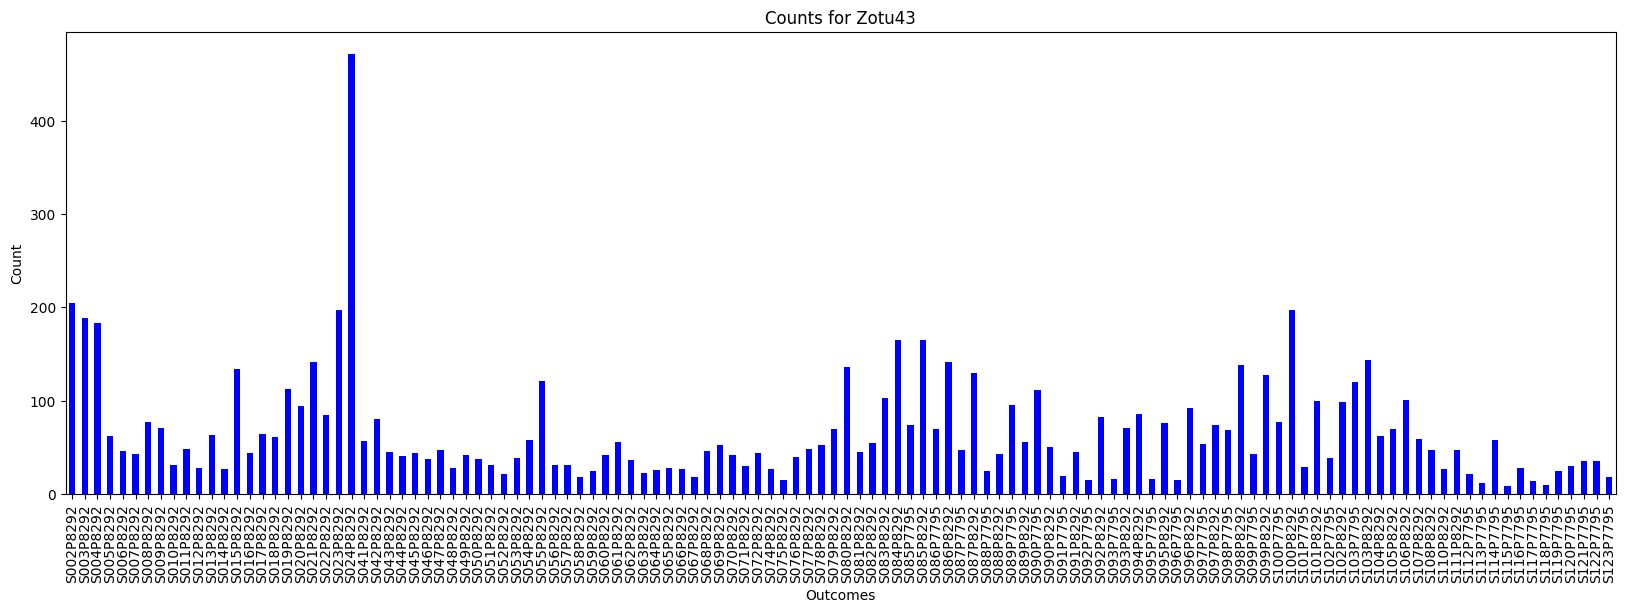

In [19]:
# this is a simple version for a bar plot, specifically using Zotu43, because this zotu contains a lot of data.
# this code is still here, but commented. This is because the code is usable, but the code that is further below
# can be used on a wider scale than one specific variable.


plt.figure(figsize=(20, 6))
zotu43.plot(kind="bar", color="blue")
plt.xlabel("Outcomes")
plt.ylabel("Count")
plt.title(f"Counts for Zotu43")
plt.show()

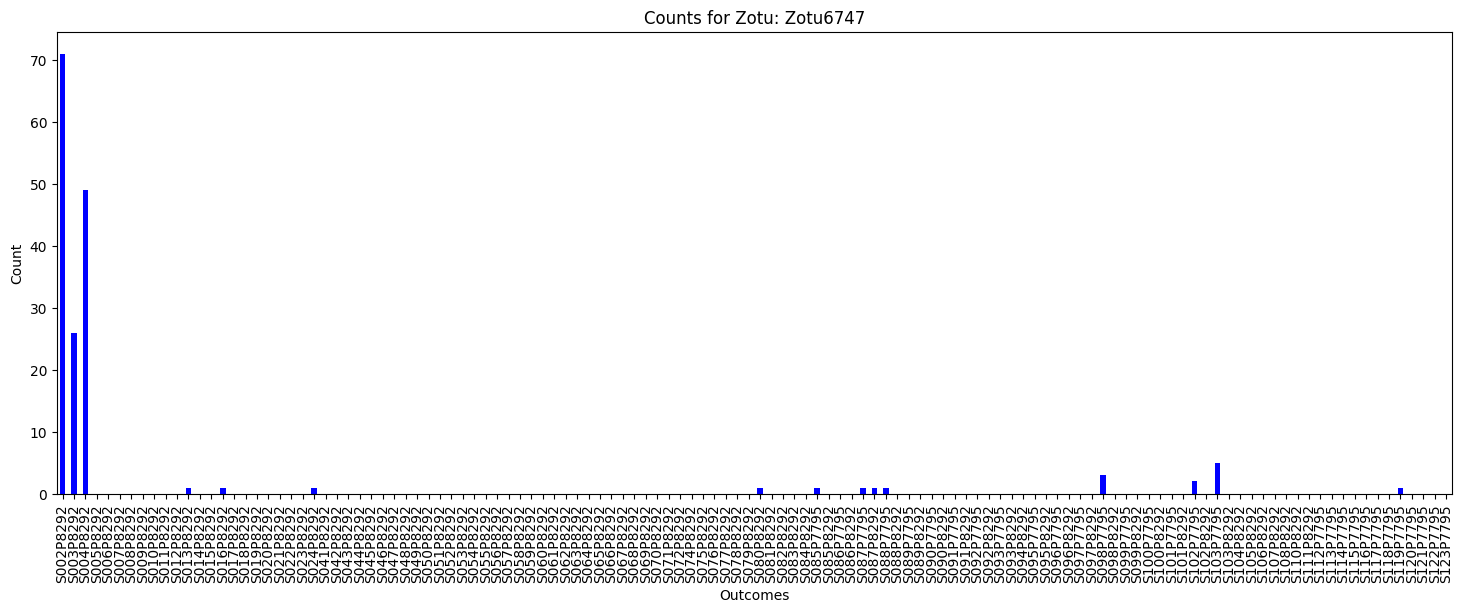

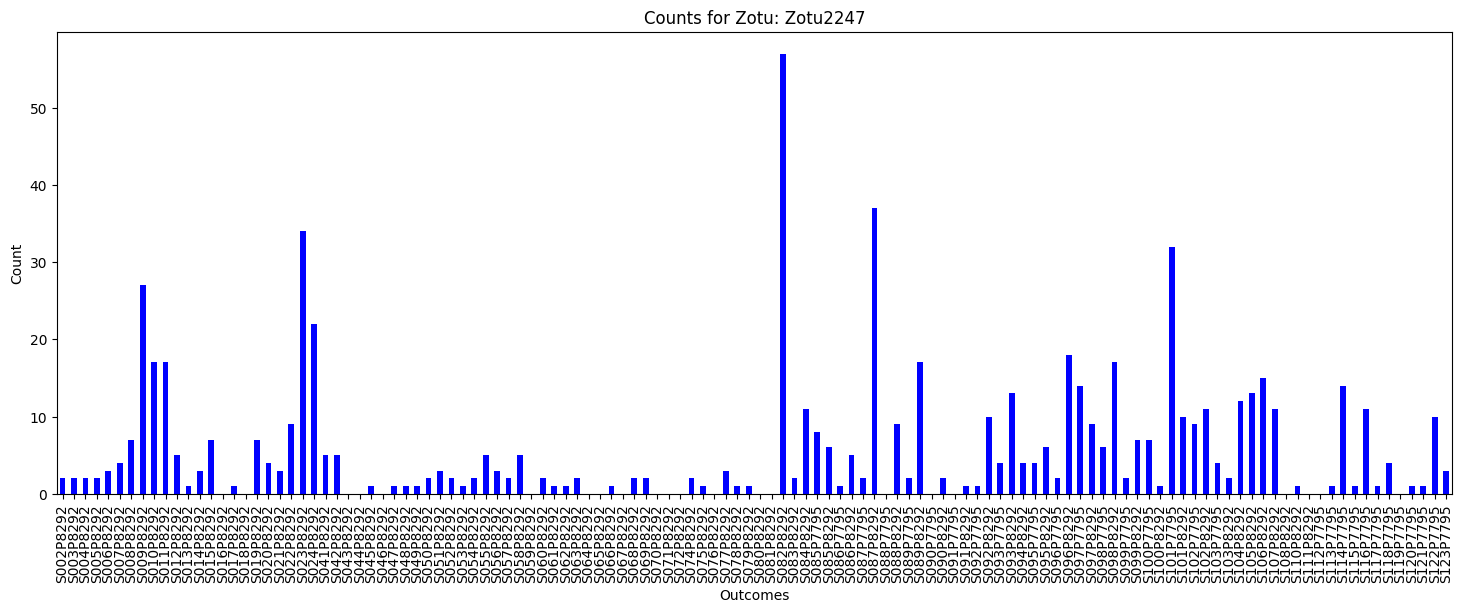

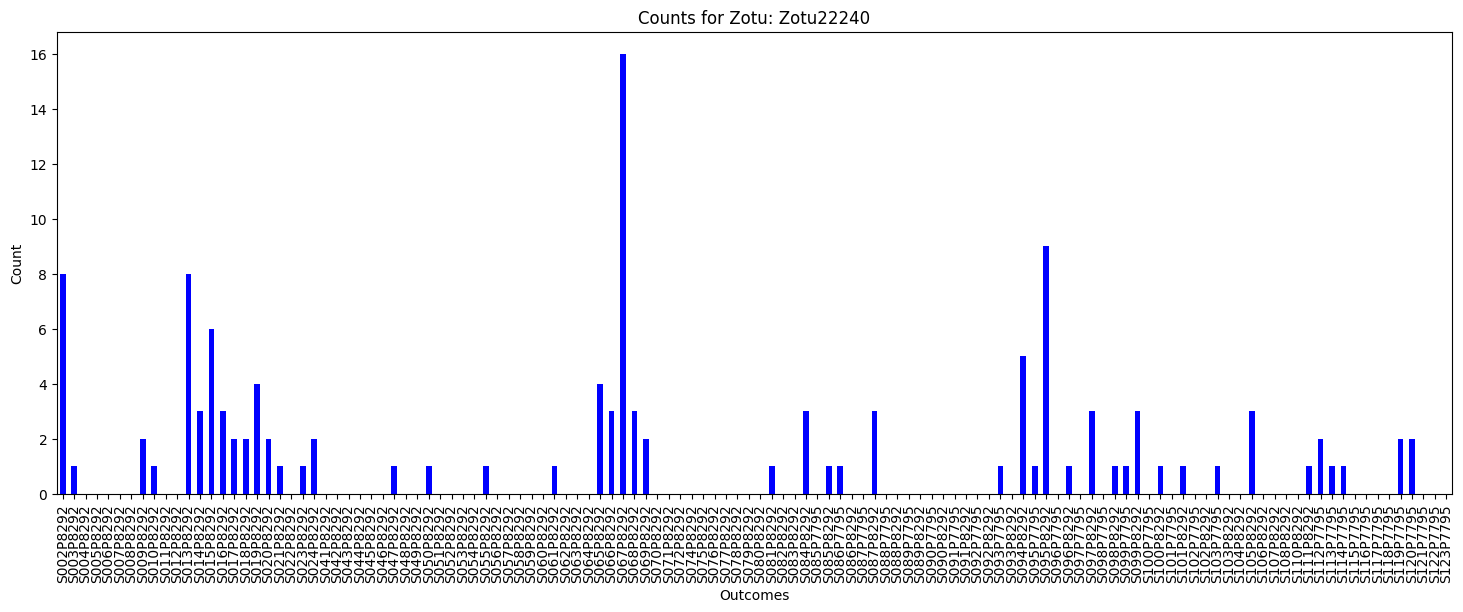

In [8]:
# This code can be used to make a barplot of all the counts from all the Zotu's in the file called ASV_counts.txt.

plots_count = 0

for index, row in df_counts.iterrows(): # iterates through df_counts to get the indices from the rows
    plt.figure(figsize=(18, 6))
    row[1:].plot(kind='bar', color='blue')
    plt.xlabel('Outcomes')
    plt.ylabel('Count')
    plt.title(f'Counts for Zotu: {index}')
    plt.show()

    plots_count += 1

    if plots_count == 3:
        break


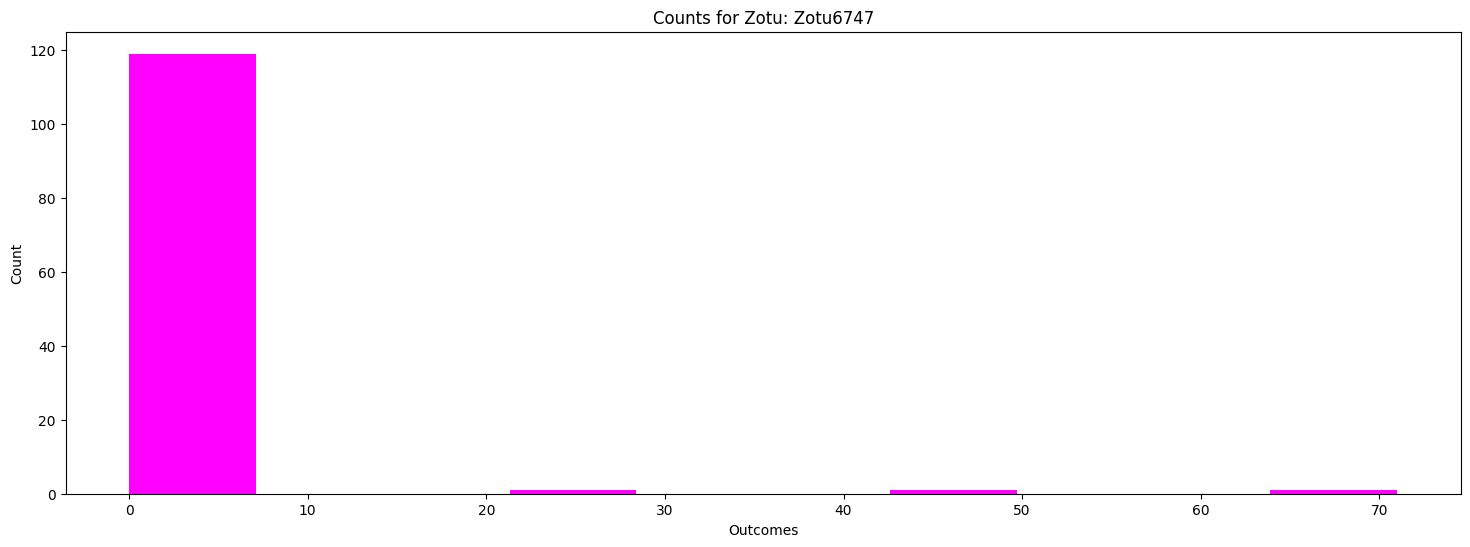

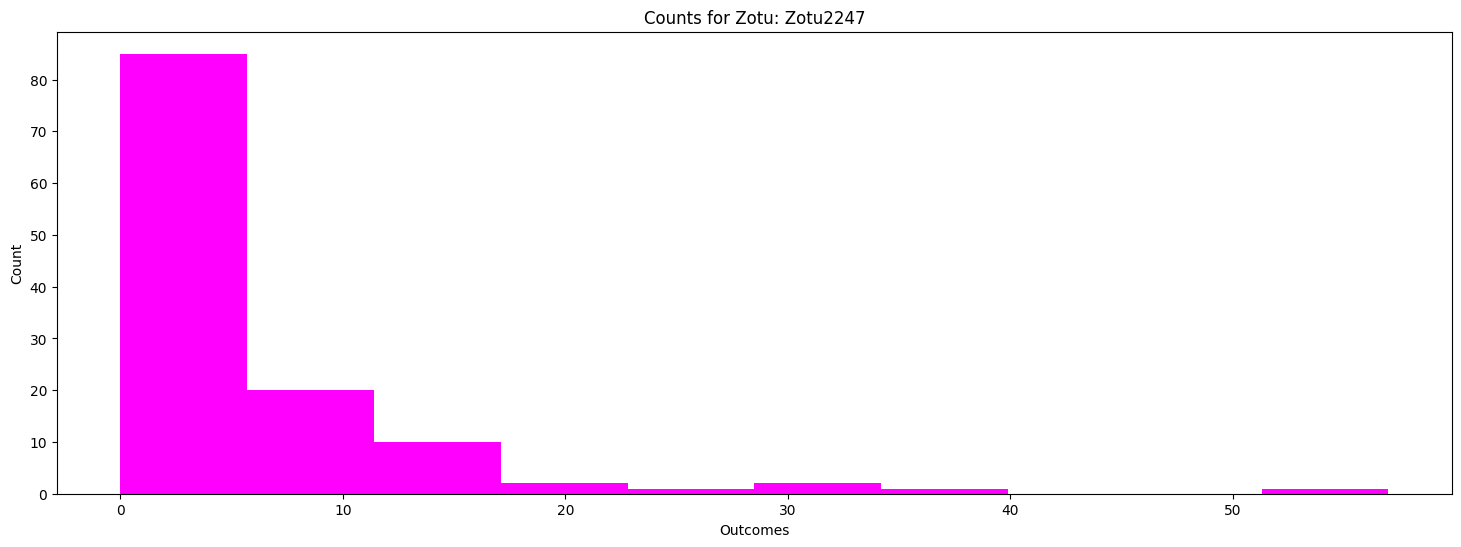

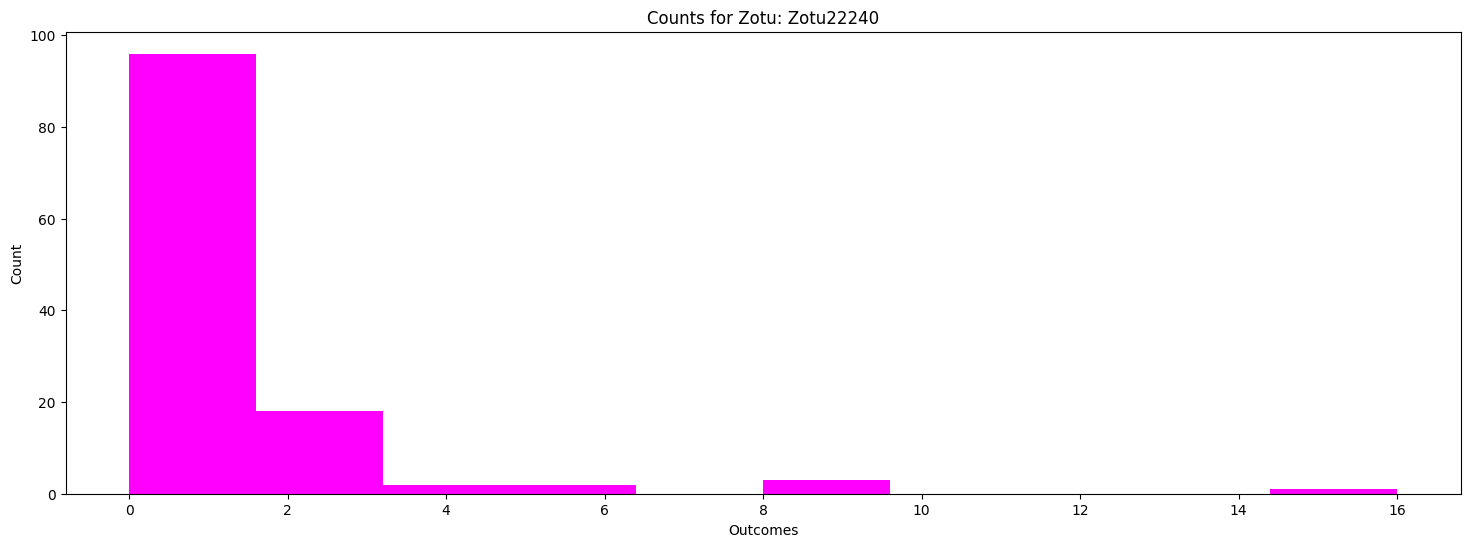

In [17]:
# This code can be used to make a histogram of all the counts from all the Zotu's in the file called ASV_counts.txt.

plots_count = 0

for index, row in df_counts.iterrows(): # iterates through df_counts to get the indices from the rows
    plt.figure(figsize=(18, 6))
    row[1:].plot(kind='hist', color='magenta')
    plt.xlabel('Outcomes')
    plt.ylabel('Count')
    plt.title(f'Counts for Zotu: {index}')
    plt.show()

    plots_count += 1

    if plots_count == 3:
        break

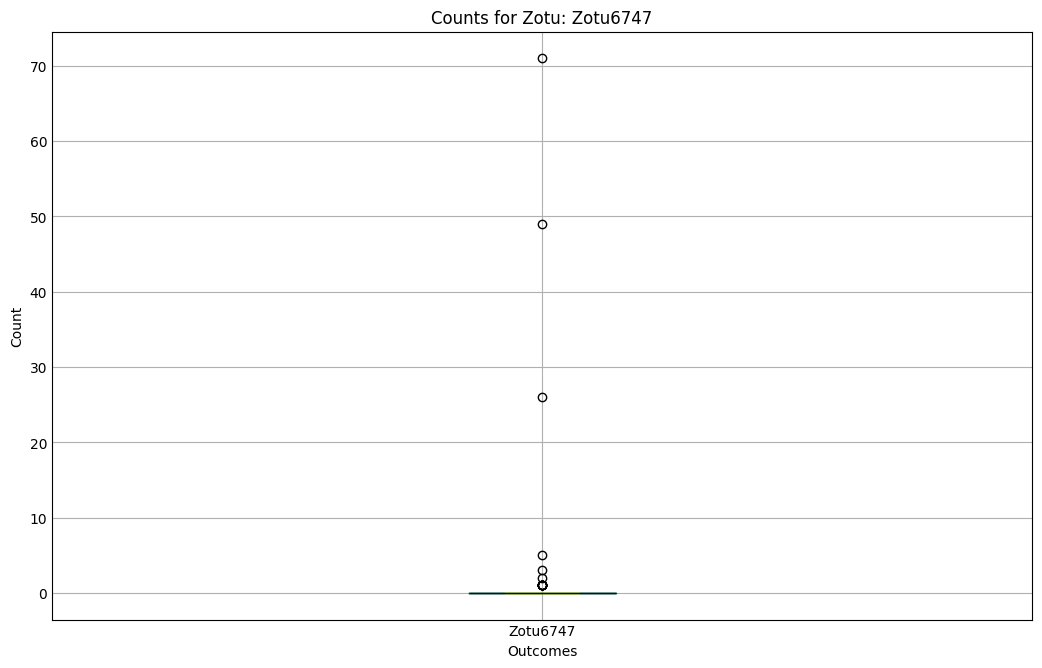

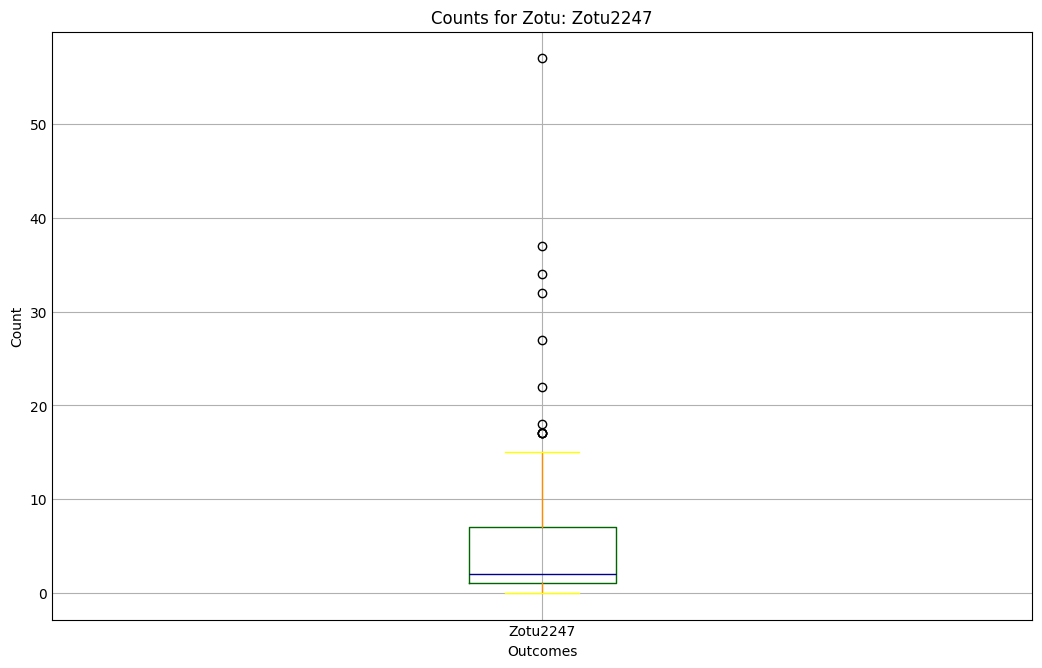

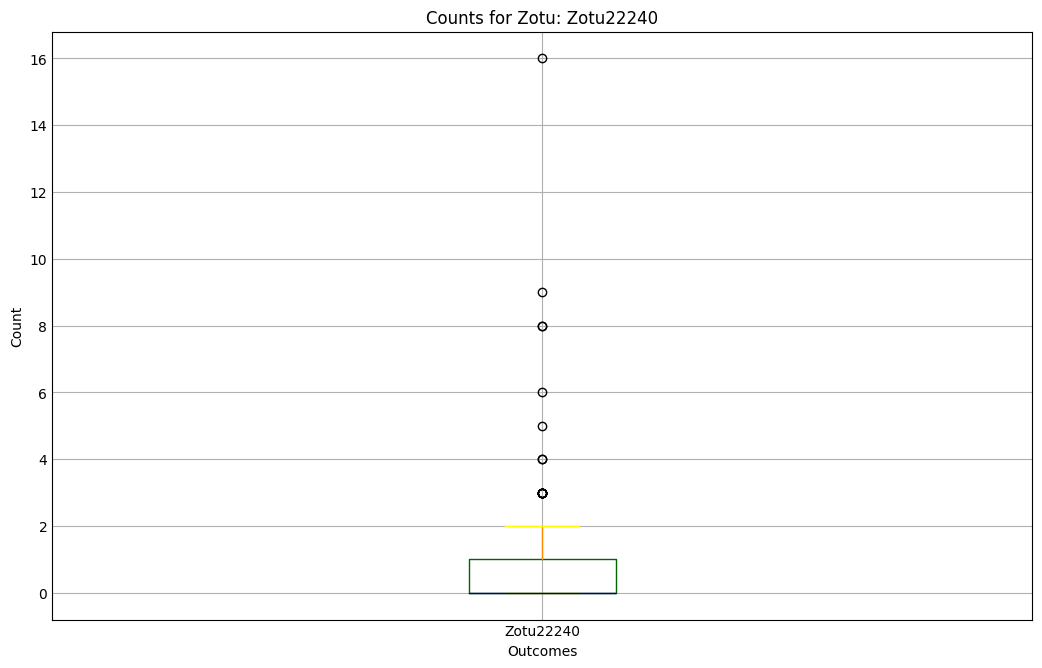

In [128]:
color = dict(boxes = "DarkGreen", whiskers = "DarkOrange",
             medians = "DarkBlue", caps = "Yellow")
plot_count = 0

for index, row in df_counts.iterrows(): # iterates through df_counts to get the indices from the rows
    plt.figure(figsize=(10, 6))
    row[1:].plot(kind='box', color=color)
    plt.xlabel('Outcomes')
    plt.ylabel('Count')
    plt.title(f'Counts for Zotu: {index}')
    plt.show()

    plot_count += 1

    if plot_count == 3:
        break

Recoding or transformations of variables may be required to get better results (e.g. from numeric to factor or vice versa, or log transformation of exponential data)

Exploration of variable relations/covariance. It is always interesting to know about correlations between variables, but this is especially the case when you have a dependent variable for which you wish to build a statistical model in a later stage of your analysis.

Sources:

Info for plots:
https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-barplot